In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import json
import os

In [8]:
data_dir = "../data/raw/pheme/"
f_name = "pheme_all_events.csv"
all_events = pd.read_csv(os.path.join(data_dir, f_name))

<ipython-input-8-75e2a30e9b96>:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  all_events = pd.read_csv(os.path.join(data_dir, f_name))


In [12]:
all_events.truth.value_counts()

true          15275
unverified    11301
false          6549
Name: truth, dtype: int64

In [10]:
all_events.event.value_counts()

charliehebdo         38268
ferguson             24175
sydneysiege          23996
ottawashooting       12284
germanwings-crash     4489
prince-toronto         902
putinmissing           835
ebola-essien           226
gurlitt                179
Name: event, dtype: int64

In [13]:
ids = all_events.thread.unique()

In [16]:
sample_net = all_events.loc[(all_events.thread == ids[0]) & (all_events.is_source_tweet != 1)]
G = nx.from_pandas_edgelist(sample_net, "user_id", "in_reply_user", create_using=nx.DiGraph)

In [17]:
a = set(sample_net.user_id.unique())
b = set(sample_net.in_reply_user.unique())

In [18]:
a.union(b)

{18370911,
 64127121,
 146142164,
 295789381,
 331658004,
 609902066,
 702591266,
 885363181,
 940853760,
 1401704990,
 2806109387,
 2888783532,
 2905430920}

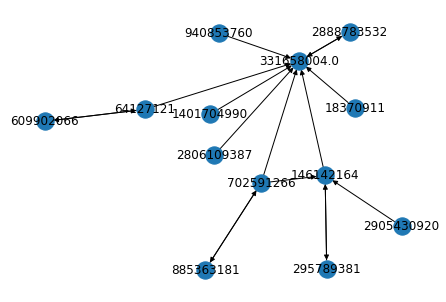

In [19]:
nx.draw(G, with_labels=True)

In [20]:
all_events.columns

Index(['truth', 'title', 'is_rumor', 'thread', 'in_reply_tweet', 'event',
       'tweet_id', 'is_source_tweet', 'in_reply_user', 'user_id',
       'tweet_length', 'symbol_count', 'user_mentions', 'urls_count',
       'media_count', 'hashtags_count', 'retweet_count', 'favorite_count',
       'mentions_count', 'is_truncated', 'created', 'has_smile_emoji',
       'sensitive', 'has_place', 'has_coords', 'has_quest', 'has_exclaim',
       'has_quest_or_exclaim', 'user.tweets_count', 'user.verified',
       'user.followers_count', 'user.listed_count', 'user.desc_length',
       'user.handle_length', 'user.name_length', 'user.notifications',
       'user.friends_count', 'user.time_zone', 'user.has_bg_img',
       'user.default_pic', 'user.created_at', 'user.location',
       'user.profile_sbcolor', 'user.profile_bgcolor', 'hasperiod',
       'number_punct', 'negativewordcount', 'positivewordcount',
       'capitalratio', 'contentlength', 'sentimentscore', 'Noun', 'Verb',
       'Adjective', '